In [1]:
library(ggplot2)

In this example, the data is in a matrix called
data.matrix
columns are individual samples (i.e. cells)
rows are measurements taken for all the samples (i.e. genes)
Just for the sake of the example, here's some made up data...

In [2]:
data.matrix <- matrix(nrow=100, ncol=10)
colnames(data.matrix) <- c(
  paste("wt", 1:5, sep=""),
  paste("ko", 1:5, sep=""))
rownames(data.matrix) <- paste("gene", 1:100, sep="")
for (i in 1:100) {
  wt.values <- rpois(5, lambda=sample(x=10:1000, size=1))
  ko.values <- rpois(5, lambda=sample(x=10:1000, size=1))
 
  data.matrix[i,] <- c(wt.values, ko.values)
}
head(data.matrix)
dim(data.matrix)

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,139,135,122,140,153,557,529,508,523,584
gene2,537,519,578,534,541,634,635,595,626,622
gene3,911,881,835,859,831,680,696,659,729,647
gene4,870,846,869,894,904,631,631,598,590,595
gene5,916,875,884,957,947,368,339,286,322,314
gene6,729,773,710,745,744,96,99,105,94,76


[1] 100  10

1) Just for reference, draw a PCA plot using this data...

In [4]:
pca <- prcomp(t(data.matrix), scale=TRUE, center=TRUE) 
 
## calculate the percentage of variation that each PC accounts for...
pca.var <- pca$sdev^2
pca.var.per <- round(pca.var/sum(pca.var)*100, 1)
pca.var.per

[1] 92.7  2.2  1.4  1.0  0.8  0.8  0.6  0.3  0.2  0.0

In [5]:
## now make a fancy looking plot that shows the PCs and the variation:
pca.data <- data.frame(Sample=rownames(pca$x),
  X=pca$x[,1],
  Y=pca$x[,2])
pca.data

,Sample,X,Y
,<chr>,<dbl>,<dbl>
wt1,wt1,-9.170997,0.10041281
wt2,wt2,-8.955393,-2.51859882
wt3,wt3,-8.995888,2.79341399
wt4,wt4,-9.373221,-1.64257226
wt5,wt5,-9.174920,1.28411775
ko1,ko1,9.026183,0.16602563
ko2,ko2,9.077194,-0.30081008
ko3,ko3,9.222161,-0.02229356
ko4,ko4,9.195327,0.75096751


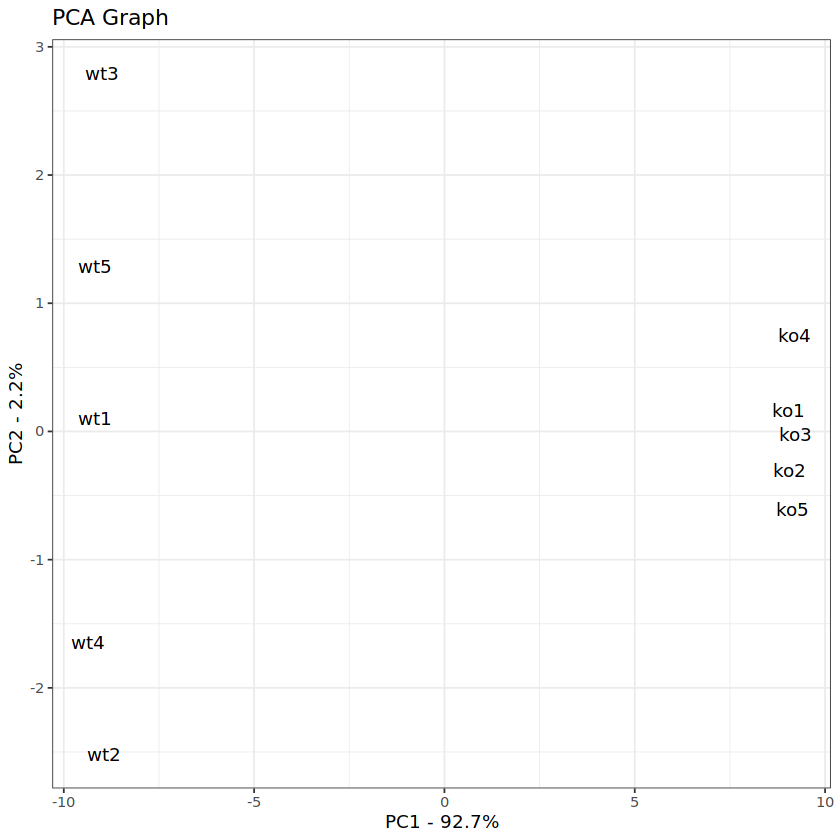

In [6]:
ggplot(data=pca.data, aes(x=X, y=Y, label=Sample)) +
  geom_text() +
  xlab(paste("PC1 - ", pca.var.per[1], "%", sep="")) +
  ylab(paste("PC2 - ", pca.var.per[2], "%", sep="")) +
  theme_bw() +
  ggtitle("PCA Graph")

2) Now draw an MDS plot using the same data and the Euclidean
distance. This graph should look the same as the PCA plot

In [7]:
## first, calculate the distance matrix using the Euclidian distance.
## NOTE: We are transposing, scaling and centering the data just like PCA.
distance.matrix <- dist(scale(t(data.matrix), center=TRUE, scale=TRUE),
  method="euclidean")
 
## do the MDS math (this is basically eigen value decomposition)
mds.stuff <- cmdscale(distance.matrix, eig=TRUE, x.ret=TRUE)
 
## calculate the percentage of variation that each MDS axis accounts for...
mds.var.per <- round(mds.stuff$eig/sum(mds.stuff$eig)*100, 1)
mds.var.per

[1] 92.7  2.2  1.4  1.0  0.8  0.8  0.6  0.3  0.2  0.0

In [8]:
## now make a fancy looking plot that shows the MDS axes and the variation:
mds.values <- mds.stuff$points
mds.data <- data.frame(Sample=rownames(mds.values),
  X=mds.values[,1],
  Y=mds.values[,2])
mds.data

,Sample,X,Y
,<chr>,<dbl>,<dbl>
wt1,wt1,-9.170997,-0.10041281
wt2,wt2,-8.955393,2.51859882
wt3,wt3,-8.995888,-2.79341399
wt4,wt4,-9.373221,1.64257226
wt5,wt5,-9.174920,-1.28411775
ko1,ko1,9.026183,-0.16602563
ko2,ko2,9.077194,0.30081008
ko3,ko3,9.222161,0.02229356
ko4,ko4,9.195327,-0.75096751


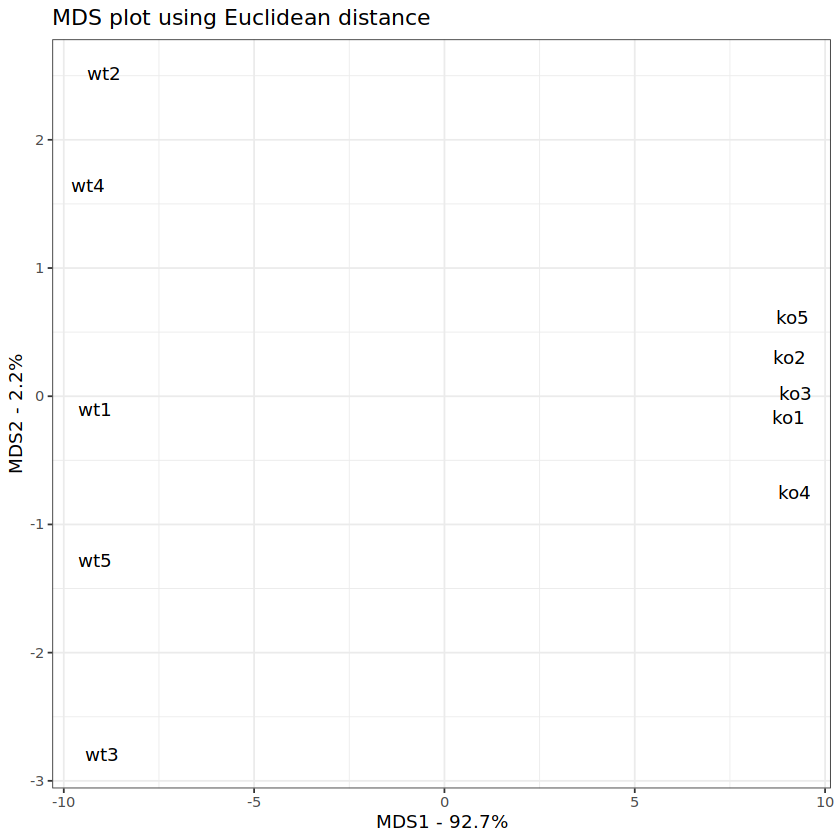

In [9]:
ggplot(data=mds.data, aes(x=X, y=Y, label=Sample)) +
  geom_text() +
  theme_bw() +
  xlab(paste("MDS1 - ", mds.var.per[1], "%", sep="")) +
  ylab(paste("MDS2 - ", mds.var.per[2], "%", sep="")) +
  ggtitle("MDS plot using Euclidean distance")

3) Now draw an MDS plot using the same data and the average log(fold change)
    This graph should look different than the first two

In [10]:
## first, take the log2 of all the values in the data.matrix.
## This makes it easy to compute log2(Fold Change) between a gene in two
## samples since...
##
## log2(Fold Change) = log2(value for sample 1) - log2(value for sample 2)
##
log2.data.matrix <- log2(data.matrix)
 
## now create an empty distance matrix
log2.distance.matrix <- matrix(0,
  nrow=ncol(log2.data.matrix),
  ncol=ncol(log2.data.matrix),
  dimnames=list(colnames(log2.data.matrix),
    colnames(log2.data.matrix)))
 
log2.distance.matrix

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
wt1,0,0,0,0,0,0,0,0,0,0
wt2,0,0,0,0,0,0,0,0,0,0
wt3,0,0,0,0,0,0,0,0,0,0
wt4,0,0,0,0,0,0,0,0,0,0
wt5,0,0,0,0,0,0,0,0,0,0
ko1,0,0,0,0,0,0,0,0,0,0
ko2,0,0,0,0,0,0,0,0,0,0
ko3,0,0,0,0,0,0,0,0,0,0
ko4,0,0,0,0,0,0,0,0,0,0
ko5,0,0,0,0,0,0,0,0,0,0


In [11]:
## now compute the distance matrix using avg(absolute value(log2(FC)))
for(i in 1:ncol(log2.distance.matrix)) {
  for(j in 1:i) {
    log2.distance.matrix[i, j] <-
      mean(abs(log2.data.matrix[,i] - log2.data.matrix[,j]))
  }
}
log2.distance.matrix

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
wt1,0.00000000,0.00000000,0.0000000,0.00000000,0.000000,0.00000000,0.00000000,0.00000000,0.0000000,0
wt2,0.09382106,0.00000000,0.0000000,0.00000000,0.000000,0.00000000,0.00000000,0.00000000,0.0000000,0
wt3,0.09656254,0.09664691,0.0000000,0.00000000,0.000000,0.00000000,0.00000000,0.00000000,0.0000000,0
wt4,0.09736014,0.08143137,0.1032533,0.00000000,0.000000,0.00000000,0.00000000,0.00000000,0.0000000,0
wt5,0.10254200,0.08661738,0.1028129,0.09555864,0.000000,0.00000000,0.00000000,0.00000000,0.0000000,0
ko1,1.50231509,1.50489206,1.5028889,1.51362921,1.515239,0.00000000,0.00000000,0.00000000,0.0000000,0
ko2,1.49990490,1.49914569,1.4994419,1.51079037,1.512828,0.08284420,0.00000000,0.00000000,0.0000000,0
ko3,1.49891927,1.49895860,1.4981188,1.50961380,1.511843,0.09421208,0.08177973,0.00000000,0.0000000,0
ko4,1.52164909,1.52244092,1.5213908,1.53326083,1.532943,0.09826479,0.09889608,0.09288674,0.0000000,0
ko5,1.52138391,1.52054532,1.5216459,1.53207297,1.532265,0.08348075,0.10133760,0.09967702,0.1015758,0


In [12]:
## do the MDS math (this is basically eigen value decomposition)
## cmdscale() is the function for "Classical Multi-Dimensional Scalign"
mds.stuff <- cmdscale(as.dist(log2.distance.matrix),
  eig=TRUE,
  x.ret=TRUE)
 
## calculate the percentage of variation that each MDS axis accounts for...
mds.var.per <- round(mds.stuff$eig/sum(mds.stuff$eig)*100, 1)
mds.var.per

[1] 99.4  0.1  0.1  0.1  0.1  0.1  0.1  0.0  0.0  0.0

In [13]:
## now make a fancy looking plot that shows the MDS axes and the variation:
mds.values <- mds.stuff$points
mds.data <- data.frame(Sample=rownames(mds.values),
  X=mds.values[,1],
  Y=mds.values[,2])
mds.data

,Sample,X,Y
,<chr>,<dbl>,<dbl>
wt1,wt1,-0.7508039,0.016654978
wt2,wt2,-0.7515532,-0.006367852
wt3,wt3,-0.7505522,0.037932517
wt4,wt4,-0.7620250,0.001045066
wt5,wt5,-0.7630430,-0.049669796
ko1,ko1,0.7500131,-0.001265257
ko2,ko2,0.7465712,0.027461508
ko3,ko3,0.7456102,0.030310009
ko4,ko4,0.7682438,-0.010327747


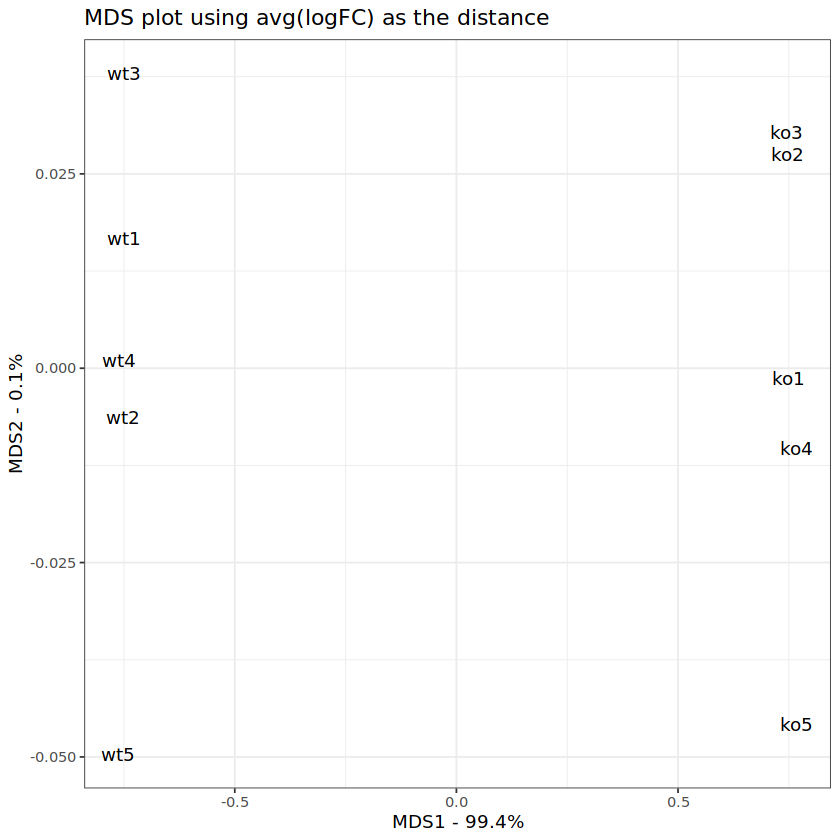

In [14]:
ggplot(data=mds.data, aes(x=X, y=Y, label=Sample)) +
  geom_text() +
  theme_bw() +
  xlab(paste("MDS1 - ", mds.var.per[1], "%", sep="")) +
  ylab(paste("MDS2 - ", mds.var.per[2], "%", sep="")) +
  ggtitle("MDS plot using avg(logFC) as the distance")
